## Nama      : Muhammad 'Ali Murrofid
## NIM       : 2141720191
## No/Kelas  : 21/TI-3E

# Import Library

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [6]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [7]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [8]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [9]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [10]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [11]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [12]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 2')

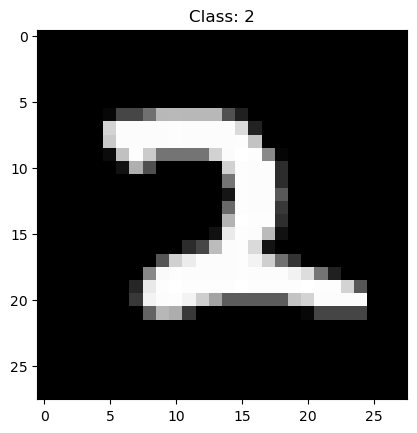

In [13]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

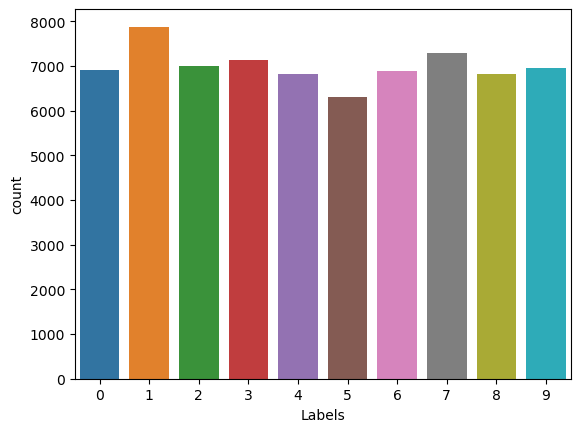

In [14]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [20]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

FileNotFoundError: [Errno 2] No such file or directory: 'alfabeto_A-Z.zip'

In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

In [ ]:
# Check shape labels
alphabet_labels.shape

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
data.shape, labels.shape

In [ ]:
# Check labels
np.unique(labels)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

# Preprocessing

In [ ]:
# Normalize data
data /= 255.0

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Check labels shape
labels.shape

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

In [ ]:
# Check the biggest value of data
classes_total.max()

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

# Split Data to Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

In [ ]:
# Check label for 24
name_labels[18]

In [ ]:
# Check y_test label for 0
y_test[1]

In [ ]:
# check the highest value
np.argmax(y_test[1])

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
network.evaluate(X_test, y_test)

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [ ]:
# You can also check the another metrics
history.history.keys()

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# Save The Model

In [ ]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model

In [ ]:
# Load saved network
load_network = load_model('network')

In [ ]:
# Check summary
load_network.summary()

In [ ]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [ ]:
# Check shape
img.shape

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

In [ ]:
# check label for 6
name_labels[6]